# SALES ANALYSIS

#### Import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from matplotlib import rc

#### Import the data files

As we can see, there is a seperate file for each month's sales. We need to merge all of them into a single data frame to perform our analysis

Let us take a look on one file

In [2]:
Jan=pd.read_csv("Sales_Data\\Sales_January_2019.csv")
Jan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


#### Combining all the files into a singe dataframe

##### First we read in all the file names

In [3]:
Files=[file for file in os.listdir("Sales_Data")]
Files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

##### Next we create an empty dataframe on which we concat each of the files

In [4]:
all_sales=pd.DataFrame()

In [5]:
for file in Files:
    df=pd.read_csv("Sales_Data\\"+file)
    all_sales=pd.concat([all_sales,df], ignore_index=True)

In [6]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
all_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Data Cleaning

In [8]:
all_sales[all_sales.isna().all(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


There are 545 rows having all NaN entries. We need to drop these

#### Dropping NaN values

In [9]:
all_sales=all_sales.dropna(how="all", axis="rows")

In [10]:
all_sales[all_sales.isna().all(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
all_sales[all_sales["Price Each"]=="Price Each"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


We need to drop each of these columns

#### Dropping more Unnecessary rows

In [12]:
all_sales=all_sales.drop(index=all_sales[all_sales["Price Each"]=="Price Each"].index)

In [13]:
all_sales[all_sales["Price Each"]=="Price Each"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [14]:
all_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


We need to convert the data types of Price Each and Quantity Ordered to float and that of Order date to datetime for further calculations

#### Data type conversion

In [15]:
all_sales["Price Each"]=all_sales["Price Each"].astype(float)
all_sales["Quantity Ordered"]=all_sales["Quantity Ordered"].astype(float)
all_sales["Order Date"]=pd.to_datetime(all_sales["Order Date"])

In [16]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [17]:
all_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 9.9+ MB


Next we sort the values with time and reset the indices

In [18]:
all_sales=all_sales.sort_values(by="Order Date").reset_index().drop(columns=["index"])

In [19]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001"
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016"
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001"
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001"
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301"


This is our final data and we store it in csv file

#### Storing DataFrame in CSV format

In [20]:
#all_sales.to_csv("All_Sales_Data.csv", index=False)

### Data Exploration

### Q1 What was the best month for sales? What was the total sales during that month?

To answer this question we need 2 more columns namely the month of each sale and the total of each sale

#### creating new columns

In [21]:
all_sales["Month"]=pd.DatetimeIndex(all_sales["Order Date"]).month
all_sales["Total"]=all_sales["Quantity Ordered"]*all_sales["Price Each"]
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90


In [22]:
month={1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul" ,8:"Aug" ,9:"Sep" ,10:"Oct" ,11:"Nov" ,12:"Dec"}
all_sales=all_sales.replace({"Month": month})
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",Jan,11.99
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",Jan,11.95
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",Jan,150.00
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",Jan,2.99
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",Jan,23.90


#### Applying agg on each Month to find  Total for each Month

In [23]:
Total_per_month=all_sales.groupby("Month").agg({"Total":np.sum})
highest_month=Total_per_month.sort_values(by="Total",ascending=False).index[0]
highest_monthly_sale=Total_per_month.sort_values(by="Total", ascending=False).iloc[0,0]

In [24]:
print("Highest sale was during the month of {} and the amount was {}$".format(highest_month,highest_monthly_sale))

Highest sale was during the month of Dec and the amount was 4613443.340001563$


#### Plotting for better insights

Text(0, 0.5, 'Total in U.S.D')

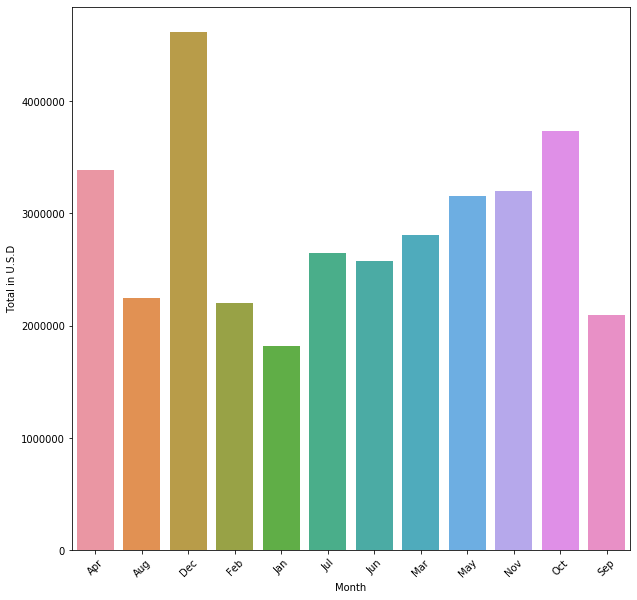

In [25]:
plot_q1=Total_per_month.reset_index()
fig,ax=plt.subplots(figsize=(10,10))
plt.xticks(rotation=45)
sns.barplot(x="Month", y="Total", data=plot_q1, ax=ax)
plt.xlabel("Month")
plt.ylabel("Total in U.S.D")

### Q2 Which City made the most Sale?

In [26]:
 all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",Jan,11.99
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",Jan,11.95
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",Jan,150.00
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",Jan,2.99
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",Jan,23.90


Similar to the previous question, we need to make a column of city. As we can see, The city name is in between the commas in Purchase address.

##### Defining functions to extract city

In [27]:
def get_city(address):
    city=address.split(",")[1].strip(" ")
    return city

In [28]:
get_city(all_sales.iloc[0,5])

'New York City'

In [29]:
def get_state(address):
    state=address.split(",")[2].split(" ")[1]
    return state

In [30]:
get_state(all_sales.iloc[0,5])

'NY'

##### Using apply( ) on column address to get city

In [31]:
all_sales["City"]=all_sales["Purchase Address"].apply(lambda x : f"{get_city(x)} ({get_state(x)})")

In [32]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",Jan,11.99,New York City (NY)
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",Jan,11.95,San Francisco (CA)
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",Jan,150.00,New York City (NY)
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",Jan,2.99,Dallas (TX)
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",Jan,23.90,Atlanta (GA)


#### Applying agg on each city to find the Total sales

In [33]:
city_sales=all_sales.groupby("City").agg({"Total":np.sum})

In [34]:
highest_city=city_sales.sort_values(by="Total", ascending=False).index[0]
highest_city_sales=city_sales.sort_values(by="Total", ascending=False).iloc[0,0]

In [35]:
print("Highest sales was in {} of ammount {} U.S.D".format(highest_city,highest_city_sales))

Highest sales was in San Francisco (CA) of ammount 8262203.910004053 U.S.D


#### Plotting for better insights

Text(0, 0.5, 'Total Sales in U.S.D')

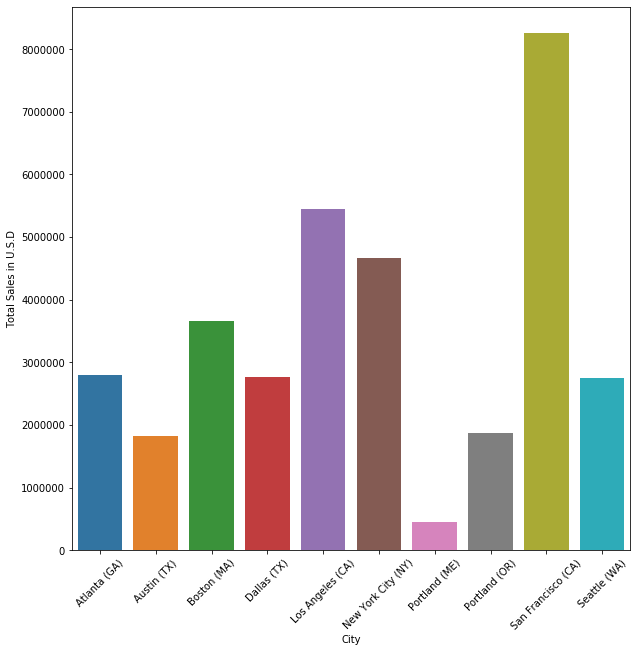

In [36]:
plot_q2=city_sales.reset_index()
plt.subplots(figsize=(10,10))
plt.xticks(rotation=45)
sns.barplot(x="City", y="Total", data=plot_q2)
plt.xlabel("City")
plt.ylabel("Total Sales in U.S.D")

### Q3 What time of the day sales is highest?

In [37]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",Jan,11.99,New York City (NY)
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",Jan,11.95,San Francisco (CA)
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",Jan,150.00,New York City (NY)
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",Jan,2.99,Dallas (TX)
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",Jan,23.90,Atlanta (GA)


#### Creating a new column of hour

In [38]:
all_sales["Hour"]=pd.DatetimeIndex(all_sales["Order Date"]).hour

In [39]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",Jan,11.99,New York City (NY),3
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",Jan,11.95,San Francisco (CA),3
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",Jan,150.00,New York City (NY),4
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",Jan,2.99,Dallas (TX),5
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",Jan,23.90,Atlanta (GA),6


#### Applying agg on Hour column groups to find the total sales at each hour

In [40]:
sales_hour=all_sales.groupby("Hour").agg({"Total":np.sum})

In [41]:
highest_hour=sales_hour.sort_values(by="Total", ascending=False).index[0]

In [42]:
print("Highest sell occurs at {}th hour".format(highest_hour))

Highest sell occurs at 19th hour


#### Plotting for better insights

Text(0, 0.5, 'Sales in U.S.D')

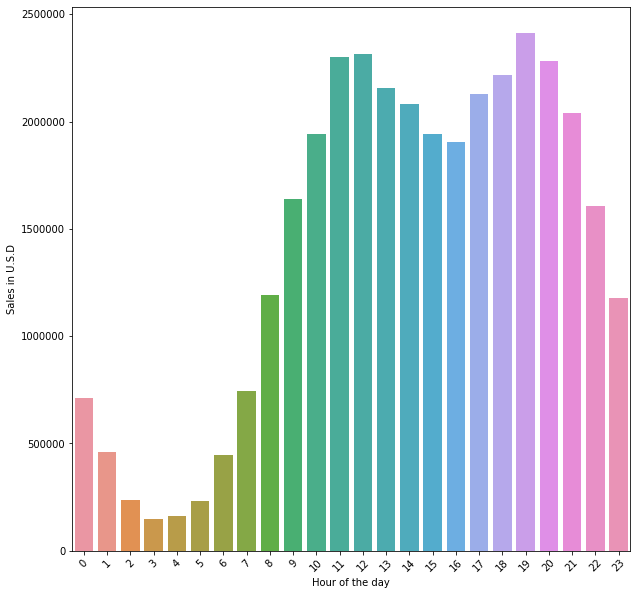

In [43]:
plot_q3=sales_hour.reset_index()
plot_q3=plot_q3.sort_values(by="Hour")
plt.subplots(figsize=(10,10))
plt.xticks(rotation=45)
sns.barplot(x="Hour", y="Total", data=plot_q3)
plt.xlabel("Hour of the day")
plt.ylabel("Sales in U.S.D")

### Q4 Which items were bought together most frequently?

In [44]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",Jan,11.99,New York City (NY),3
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",Jan,11.95,San Francisco (CA),3
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",Jan,150.00,New York City (NY),4
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",Jan,2.99,Dallas (TX),5
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",Jan,23.90,Atlanta (GA),6


#### Rows having same Order ID were brought together. So we need only keep the Order ID's which were repeated atleast once

In [45]:
df=all_sales[all_sales["Order ID"].duplicated(keep=False)]

#### For each unique Order ID we group all the products and put them in a column

In [46]:
df["Grouped"]=df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
df.head()

C:\Users\Amartya057\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour,Grouped
11,144804,iPhone,1.0,700.00,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",Jan,700.00,New York City (NY),7,"iPhone,Wired Headphones"
12,144804,Wired Headphones,1.0,11.99,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",Jan,11.99,New York City (NY),7,"iPhone,Wired Headphones"
65,148074,USB-C Charging Cable,1.0,11.95,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",Jan,11.95,Atlanta (GA),11,"USB-C Charging Cable,Google Phone"
66,148074,Google Phone,1.0,600.00,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",Jan,600.00,Atlanta (GA),11,"USB-C Charging Cable,Google Phone"
79,148450,iPhone,1.0,700.00,2019-01-01 12:02:00,"761 Lakeview St, Dallas, TX 75001",Jan,700.00,Dallas (TX),12,"iPhone,Lightning Charging Cable"


#### Now we need to remove the duplicates as we do not need them any longer

In [47]:
df=df[["Order ID","Grouped","Quantity Ordered"]].drop_duplicates()

In [48]:
df.head()

,Order ID,Grouped,Quantity Ordered
11,144804,"iPhone,Wired Headphones",1.0
65,148074,"USB-C Charging Cable,Google Phone",1.0
79,148450,"iPhone,Lightning Charging Cable",1.0
92,144679,"USB-C Charging Cable,Google Phone",1.0
94,147451,"Wired Headphones,Google Phone",1.0


#### As a,b and b,a are same, we need to merge them

#### Writing a function to make a,b and b,a the same

In [49]:
def split(grouped):
    l=sorted(grouped.split(","))
    res=""
    for i in range(len(l)):
        res=res+","+l[i]
    return res[1:]

In [50]:
split("iPhone,Wired Headphones")

'Wired Headphones,iPhone'

In [51]:
split("Wired Headphones,iPhone")

'Wired Headphones,iPhone'

#### Applying the split function to Grouped column

In [52]:
df["Grouped"]=df["Grouped"].apply(lambda x: split(x))

#### Finding the total quantity sold for each combo

In [53]:
sold_together=df.groupby("Grouped").agg({"Quantity Ordered": np.sum})
sold_together=sold_together.sort_values(by="Quantity Ordered", ascending=False)

In [54]:
sold_together.iloc[:10,:]

,Quantity Ordered
Grouped,
"Google Phone,USB-C Charging Cable",1009.0
"Lightning Charging Cable,iPhone",1002.0
"Wired Headphones,iPhone",435.0
"Google Phone,Wired Headphones",372.0
"USB-C Charging Cable,Vareebadd Phone",366.0
"Apple Airpods Headphones,iPhone",301.0
"AA Batteries (4-pack),AAA Batteries (4-pack)",193.0
"AAA Batteries (4-pack),USB-C Charging Cable",179.0
"Bose SoundSport Headphones,Google Phone",171.0


#### Plotting for better insights

Text(0, 0.5, 'Quantity Ordered')

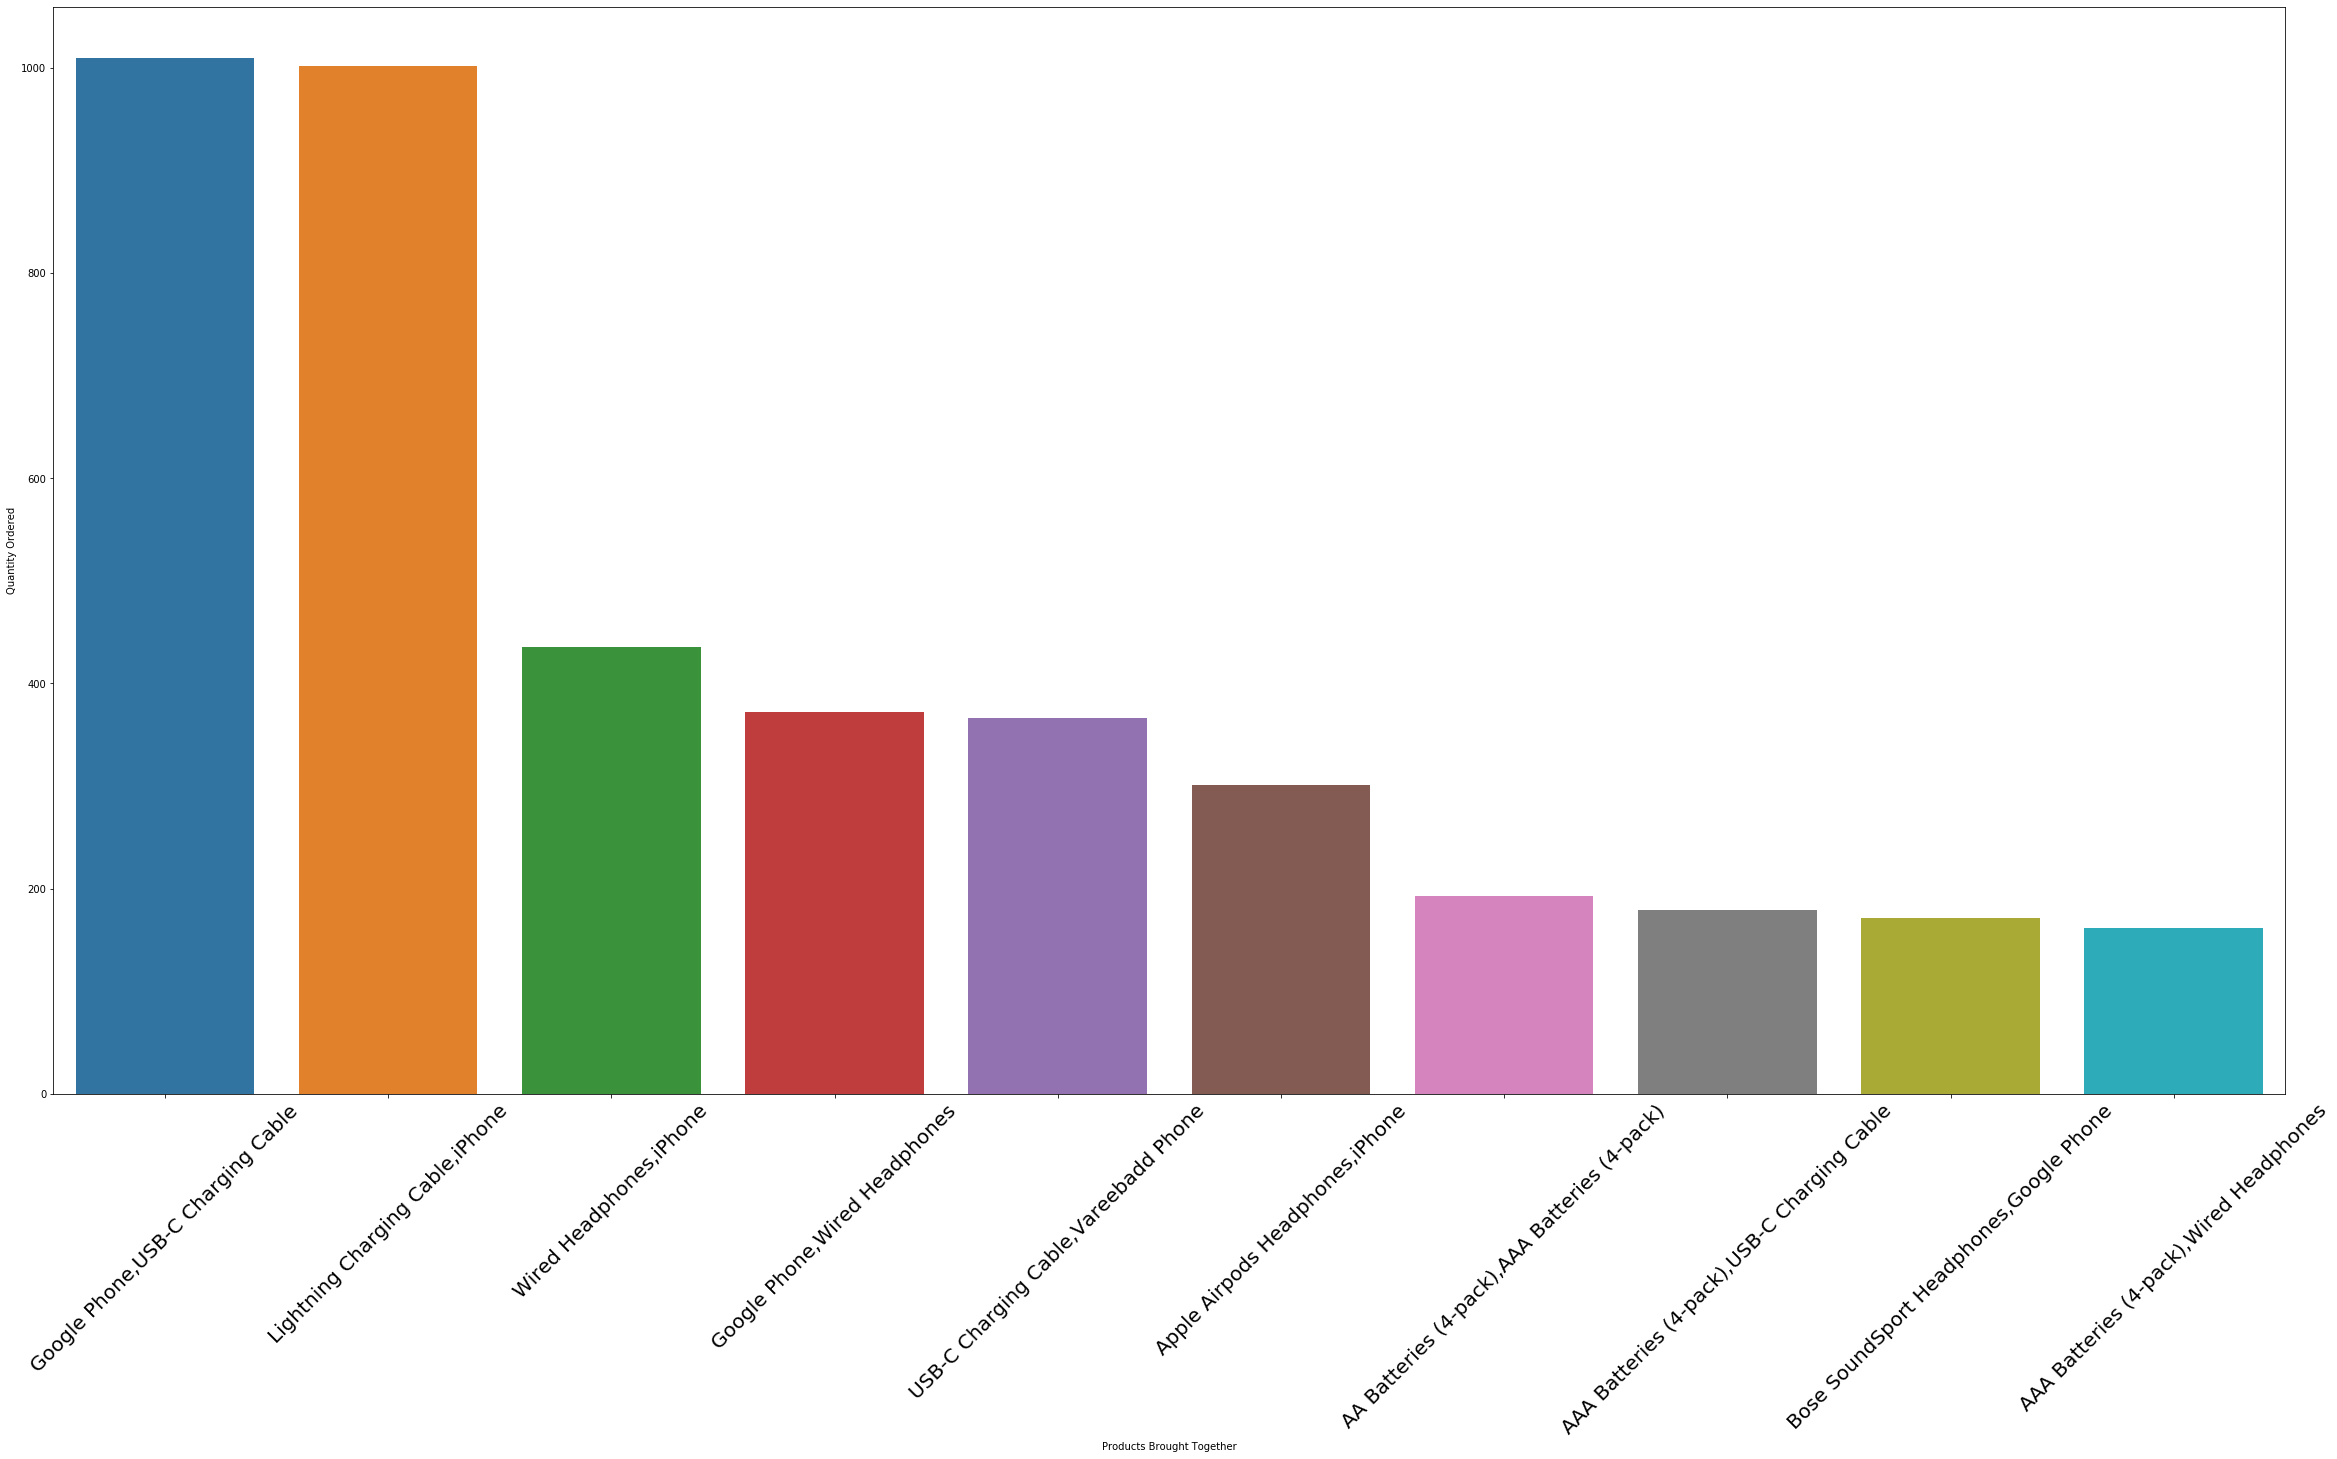

In [55]:
plot_q4=sold_together.iloc[:10,:].reset_index()
plt.subplots(figsize=(40,20))
plt.xticks(fontsize=20,rotation=45)
#sns.set_context(font_scale=2)
sns.barplot(x="Grouped", y="Quantity Ordered", data=plot_q4)
plt.xlabel("Products Brought Together")
plt.ylabel("Quantity Ordered")

### Q5 Which Product sold the most

In [56]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",Jan,11.99,New York City (NY),3
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",Jan,11.95,San Francisco (CA),3
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",Jan,150.00,New York City (NY),4
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",Jan,2.99,Dallas (TX),5
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",Jan,23.90,Atlanta (GA),6


#### Grouping by product and finding the quantity sold for each

In [57]:
product_sales=all_sales.groupby("Product").agg({"Quantity Ordered":np.sum}).sort_values(by="Quantity Ordered", ascending=False)

In [58]:
product_sales.head()

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017.0
AA Batteries (4-pack),27635.0
USB-C Charging Cable,23975.0
Lightning Charging Cable,23217.0
Wired Headphones,20557.0


#### Plotting for better insights 

In [59]:
plot_q5=product_sales.iloc[:15,:]
plot_q5=plot_q5.reset_index()
plot_q5.head()

,Product,Quantity Ordered
0,AAA Batteries (4-pack),31017.0
1,AA Batteries (4-pack),27635.0
2,USB-C Charging Cable,23975.0
3,Lightning Charging Cable,23217.0
4,Wired Headphones,20557.0


In [60]:
indices=list(product_sales.index[:15])

In [61]:
mean_price=all_sales.groupby("Product").agg({"Price Each":np.mean})
mean_price=mean_price.loc[indices,:]
mean_price=mean_price.reset_index()

Text(0, 0.5, 'Mean Price')

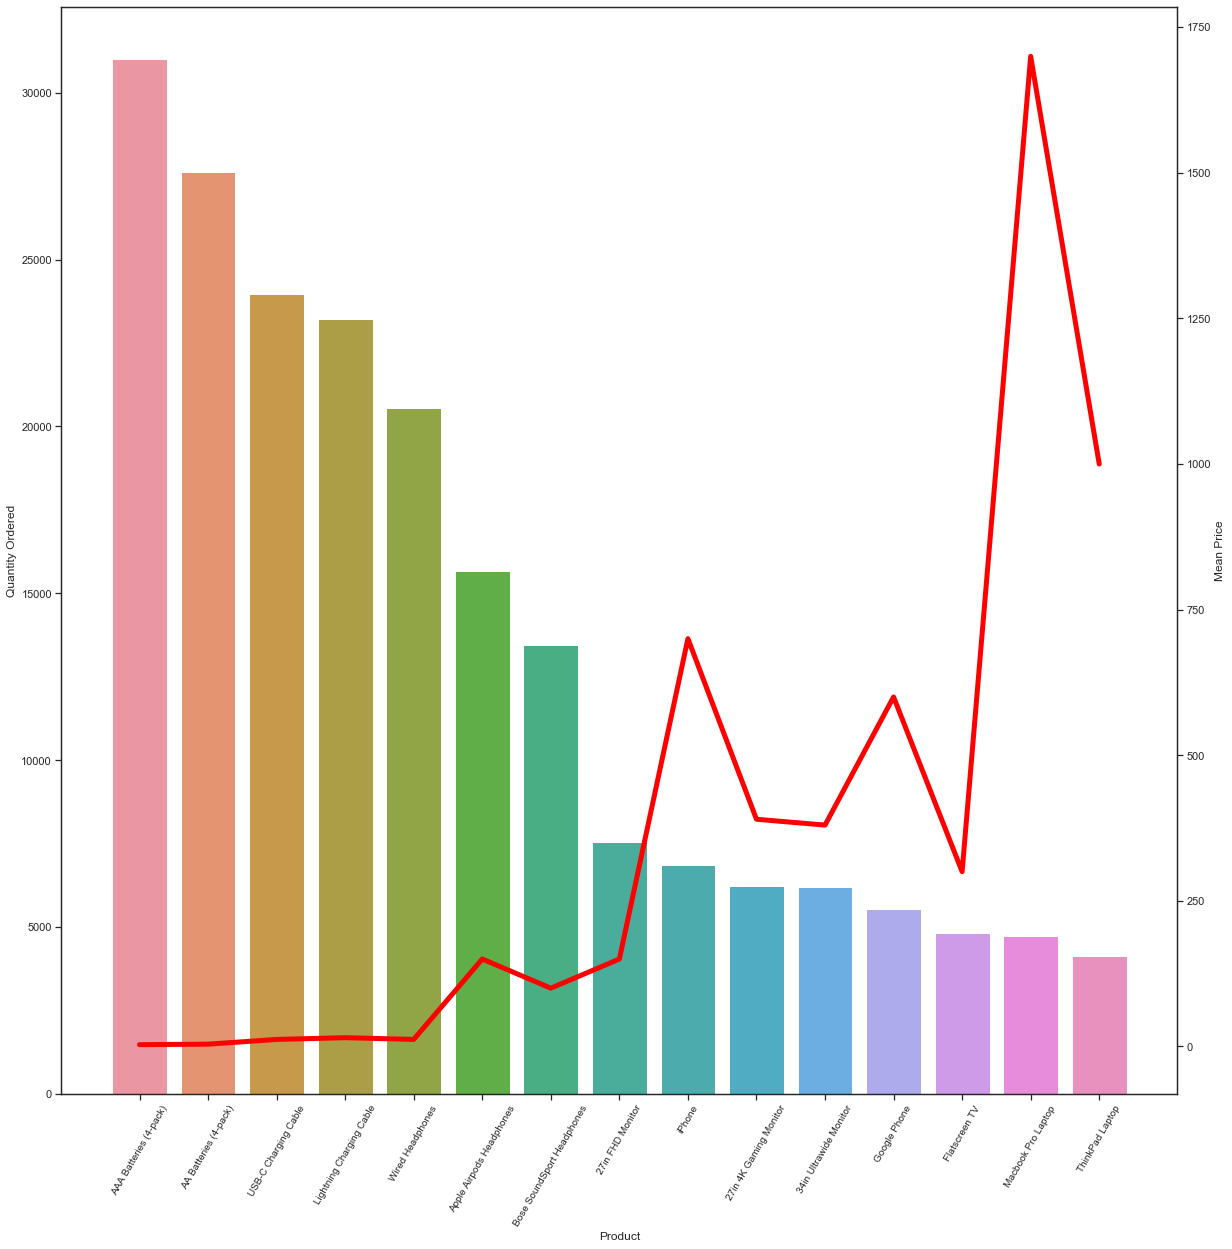

In [63]:
fig,ax=plt.subplots(figsize=(20,20))
plt.xticks(fontsize=10, rotation=60)
sns.set(style="ticks", rc={"lines.linewidth": 5})
sns.barplot(x="Product",y="Quantity Ordered", data=plot_q5, ax=ax)
ax2=ax.twinx()
sns.lineplot(x="Product", y="Price Each", data=mean_price, sort=False, ax=ax2, color="red")
ax.set_xlabel("Product")
ax.set_ylabel("Quantity Ordered")
ax2.set_ylabel("Mean Price")

## THE END